In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.manifold import TSNE
from pandas.tools.plotting import andrews_curves
import os
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import radviz
import scipy

In [7]:
os.chdir('/home/tapas/Downloads/')

In [9]:
df = pd.read_csv('pul.csv')

In [10]:
df.head(5)

,DPS,MarketCap,SD,CEORemun,X1.R2,Indep,Board,EPS,gEPS,Lev
0,37.15,6491.29,2.62,33000000.0,0.440906,0.444444,9,1.70,0.148649,0.042698
1,70.77,47139.22,1.55,55653000.0,0.916958,0.615385,13,5.54,0.658683,0.001004
2,18.60,5273.84,2.09,39842616.0,0.908736,0.600000,15,5.49,0.294811,0.311273
3,26.60,24061.89,1.91,128956666.0,0.995988,0.307692,13,4.27,0.958716,0.079265
4,42.29,102749.27,1.50,97205442.0,0.816447,0.466667,15,18.75,0.074499,0.001015


In [11]:
df.shape

(100, 10)

In [12]:
def multiplot(data,features,plottype,nrows,ncols,figsize,y=None,colorize=False):
    """ This function draw a multi plot for 3 types of plots ["regplot","distplot","coutplot"]"""
    n = 0
    plt.figure(1)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    if colorize:
        colors = sns.color_palette(n_colors=(nrows*ncols))
    else :
        colors = [None]*(nrows*ncols)
        
    for row in range(ncols):
        for col in range(nrows):
            
            if plottype == 'regplot':
                if y == None:
                    raise ValueError('y value is needed with regplot type')
                
                sns.regplot(data = data, x = features[n], y = y ,ax=axes[row,col], color = colors[n])
                correlation = np.corrcoef(data[features[n]],data[y])[0,1]
                axes[row,col].set_title("Correlation {:.2f}".format(correlation))
            
            elif plottype == 'distplot':
                sns.distplot(a = data[features[n]],ax = axes[row,col],color=colors[n])
                skewness = data[features[n]].skew()
                axes[row,col].legend(["Skew : {:.2f}".format(skewness)])
            
            elif plottype in ['countplot']:
                g = sns.countplot(x = data[features[n]], y = y, ax = axes[row,col],color = colors[n])
                g = plt.setp(g.get_xticklabels(), rotation=45)
                
            n += 1
    plt.tight_layout()
    plt.show()
    plt.gcf().clear()

In [13]:
df.columns

Index(['DPS', 'MarketCap', 'SD', 'CEORemun', 'X1.R2', 'Indep', 'Board', 'EPS',
       'gEPS', 'Lev'],
      dtype='object')

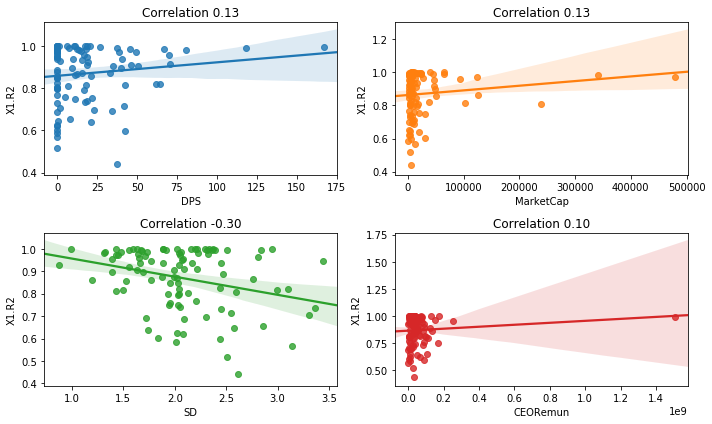

In [14]:
feats = ['DPS', 'MarketCap', 'SD', 'CEORemun', 'Indep', 'Board', 'EPS','gEPS', 'Lev']

multiplot(data = df,features = feats,plottype = "regplot",nrows = 2, ncols = 2,
          figsize = (10,6),y = 'X1.R2', colorize = True)

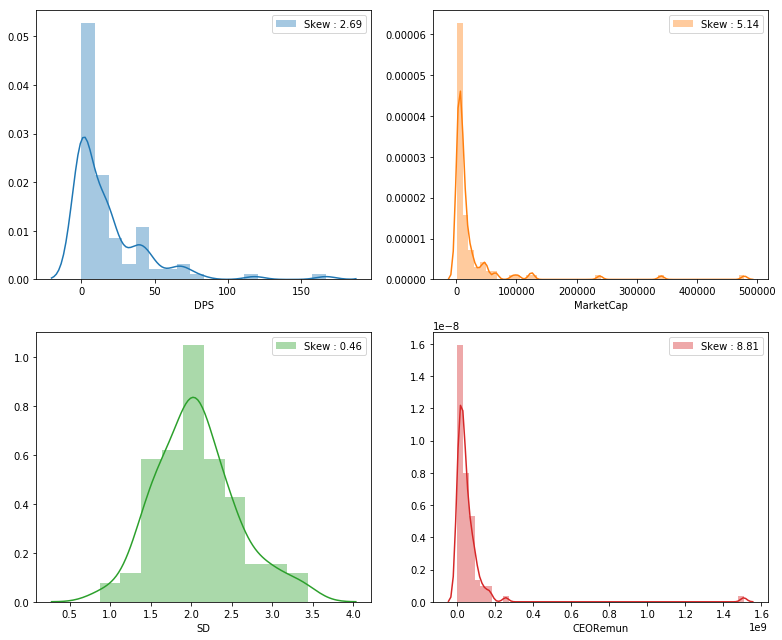

In [15]:
skewed_features = ['DPS', 'MarketCap', 'SD', 'CEORemun', 'Indep', 'Board', 'EPS','gEPS', 'Lev']
multiplot(data = df,features = skewed_features,plottype = "distplot",
          nrows = 2, ncols = 2, figsize = (11,9), colorize = True)

/home/tapas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in log1p



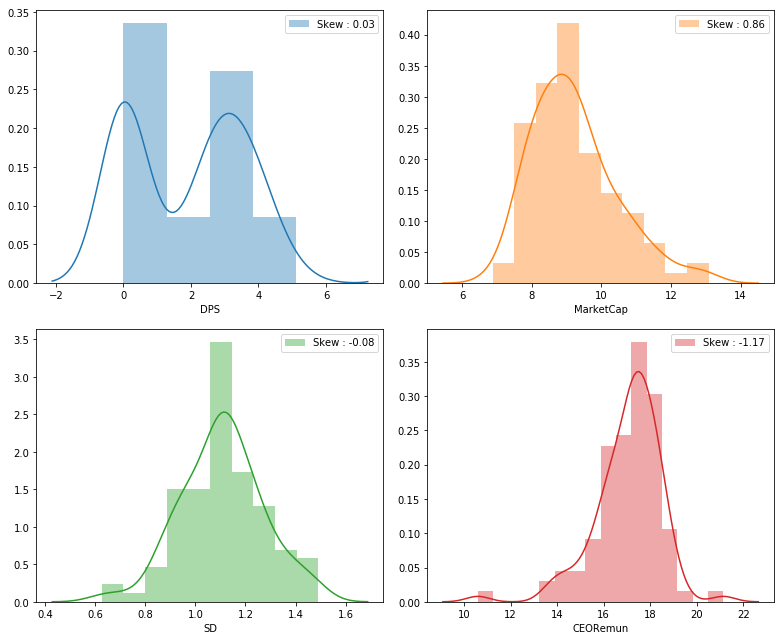

In [16]:
for feature in skewed_features:
    df[feature] = np.log1p(df[feature])
multiplot(data = df,features = skewed_features,plottype = "distplot",
          nrows = 2, ncols = 2, figsize = (11,9), colorize = True)

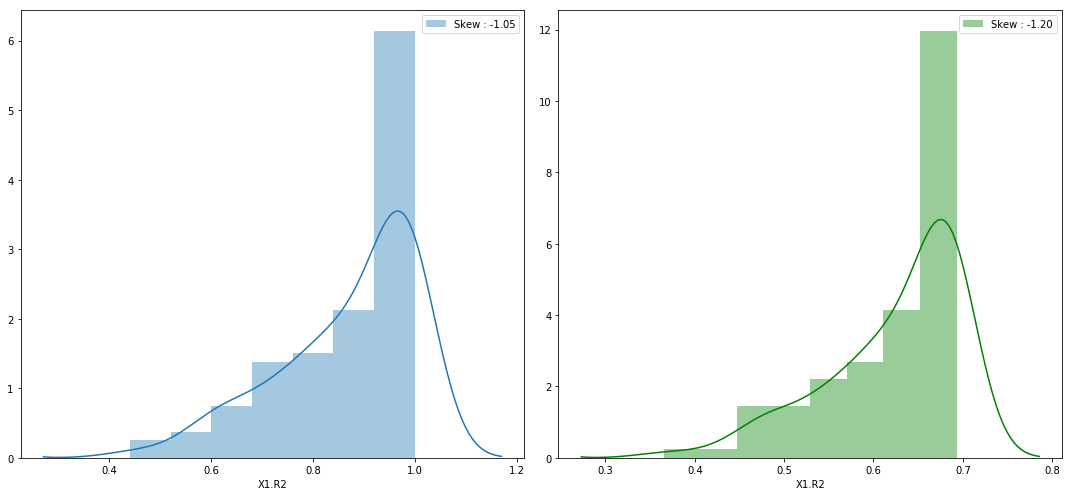

In [17]:
plt.figure(1)
fig, axes = plt.subplots(1,2,figsize=(15,7))

sns.distplot(df['X1.R2'],ax = axes[0])
sns.distplot(np.log1p(df['X1.R2']),ax = axes[1],color="g")

axes[0].legend(["Skew : {:.2f}".format(df['X1.R2'].skew())])
axes[1].legend(["Skew : {:.2f}".format(np.log1p(df['X1.R2']).skew())])

plt.tight_layout()
plt.show()
plt.gcf().clear()

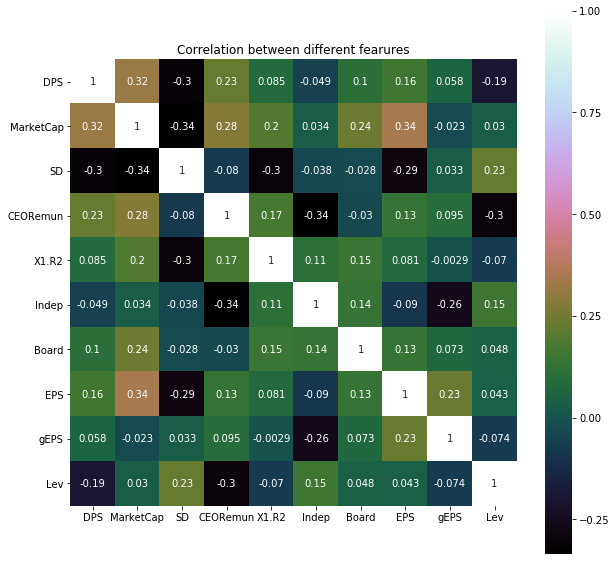

In [18]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

# Transformation

In [19]:
df['X1.R2'] = np.log1p(df['X1.R2'])
Y = df['X1.R2']
df = df.drop(labels='X1.R2',axis = 1)

In [20]:
features = df.columns

In [21]:
df.isnull().sum()

DPS          0
MarketCap    0
SD           0
CEORemun     0
Indep        0
Board        0
EPS          2
gEPS         4
Lev          0
dtype: int64

In [22]:
df = df.fillna(0)

In [24]:
from sklearn.preprocessing import RobustScaler
# Normalize data 
#N = Normalizer()
N = RobustScaler()

N.fit(df)

df = N.transform(df)

In [25]:
train_len = len(df)

In [26]:
## Separate train dataset 
X_train = df[:train_len]

# Modelling

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y)

# display coefficients
print(regressor.coef_)

[-0.00890415  0.0023115  -0.02927445  0.01881398  0.01106151  0.01200944
 -0.00258494  0.00111761  0.00296855]


In [41]:
import numpy as np
import statsmodels.api as sm

/home/tapas/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [42]:
results = sm.OLS(Y, X_train).fit()

In [44]:
# Print the summary
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                  X1.R2   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     2.739
Date:                Fri, 01 Dec 2017   Prob (F-statistic):            0.00708
Time:                        01:40:18   Log-Likelihood:                -83.362
No. Observations:                 100   AIC:                             184.7
Df Residuals:                      91   BIC:                             208.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3630      0.116     -3.129      0.0

In [45]:
print("\nRetrieving manually the parameter estimates:")
print(results.params)


Retrieving manually the parameter estimates:
x1   -0.363049
x2    0.165117
x3   -0.103994
x4   -0.033198
x5   -0.007423
x6   -0.008855
x7   -0.012751
x8   -0.013900
x9    0.148594
dtype: float64
